<a href="https://colab.research.google.com/github/Pravallika-Myneni/Data_science_pipeline/blob/main/pm_milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/MyDrive/income-mapped-zip-code.csv', index_col = [0])
df.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Zipcode,Median_Income,Mean_Income,Age Group,Arrest Date,Arrest Key,Ofns Desc,Pd Desc,Perp Race,Perp Sex,Arrest Precinct,Lat,Lon,LatLon
0,10001,96787,166167,<18,3/24/2019,195084931,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,M,14,40.75,-73.99,"(40.75, -73.99)"
1,10001,96787,166167,25-44,7/11/2018,185049784,F.C.A. P.I.N.O.S.,"FUGITIVE,FROM OTHER STATES",WHITE,F,14,40.75,-73.99,"(40.75, -73.99)"


In [4]:
df_ = df.drop(columns = {'LatLon'}).rename(columns =  {col : col.replace(' ', '_') for col in df.columns if col not in ['Lat', 'Lon']})
df_['Arrest_Date'] = pd.to_datetime(df_.Arrest_Date)
df_['week'] = df_['Arrest_Date'].dt.week
df_['day'] = df_['Arrest_Date'].dt.day
df_['month'] = df_['Arrest_Date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


May be before clustering, we can rank the ofns_Desc and use that as one more attribute for clustering..

we can use other attributes as well here

# Clustering into high threat - medium threat and low threat zones

In [5]:
clustering_df = df_.copy()[['Zipcode', 'Arrest_Key']]
clustering_df_ = clustering_df.groupby(['Zipcode']).count()['Arrest_Key'].to_frame().reset_index()
clustering_df_['Zipcode'] = clustering_df_['Zipcode'].astype('str') 

Is there a point to do this.. convert to str then encode it?? For now, assuming no

In [ ]:
"""from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])

clustering_df_.head(2)"""

"from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nclustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])\n\nclustering_df_.head(2)"

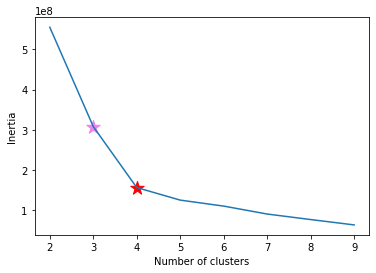

In [8]:
from sklearn.cluster import KMeans
X = np.array(clustering_df_)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias)
plt.scatter(3,inertias[1], s = 200, c = 'violet', marker='*')
plt.scatter(4,inertias[2], s = 200, c = 'red', marker='*')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [9]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean', n_jobs=-1)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6368779125486689)
For n_clusters = 3, silhouette score is 0.5686892638501928)
For n_clusters = 4, silhouette score is 0.552016451748841)
For n_clusters = 5, silhouette score is 0.44738944263612895)
For n_clusters = 6, silhouette score is 0.4693057248991196)
For n_clusters = 7, silhouette score is 0.49742801645891305)
For n_clusters = 8, silhouette score is 0.4669281454317254)
For n_clusters = 9, silhouette score is 0.4610345830493775)


Silhouetee score is takiing ages to calculate.. try again later?

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
pred = y_kmeans

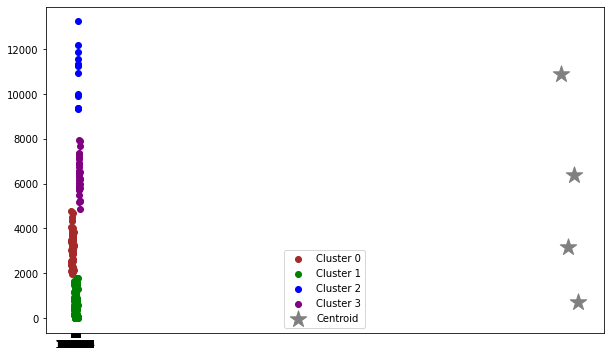

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'gray', label = 'Centroid', marker='*')
plt.legend()

In [12]:
clustering_df_.shape

(193, 2)

In [13]:
pred.shape

(193,)

In [14]:
clustering_df_['Label'] = pred
clustering_df_.head(5)

,Zipcode,Arrest_Key,Label
0,10001,11357,2
1,10002,4775,0
2,10003,4061,0
3,10004,423,1
4,10007,2088,0


In [15]:
clustering_df_[clustering_df_['Label'] ==0].describe()

,Arrest_Key,Label
count,57.000000,57.0
mean,3189.192982,0.0
std,750.669378,0.0
min,1953.000000,0.0
25%,2559.000000,0.0
50%,3196.000000,0.0
75%,3664.000000,0.0
max,4775.000000,0.0


In [16]:
clustering_df_[clustering_df_['Label'] ==1].describe()

,Arrest_Key,Label
count,91.000000,91.0
mean,732.395604,1.0
std,560.117902,0.0
min,2.000000,1.0
25%,191.000000,1.0
50%,589.000000,1.0
75%,1292.000000,1.0
max,1808.000000,1.0


In [17]:
clustering_df_[clustering_df_['Label'] == 2].describe()

,Arrest_Key,Label
count,13.000000,13.0
mean,10895.307692,2.0
std,1220.431507,0.0
min,9342.000000,2.0
25%,9890.000000,2.0
50%,11252.000000,2.0
75%,11541.000000,2.0
max,13235.000000,2.0


In [18]:
clustering_df_[clustering_df_['Label'] ==3].describe()

,Arrest_Key,Label
count,32.00000,32.0
mean,6364.06250,3.0
std,787.34437,0.0
min,4883.00000,3.0
25%,5852.50000,3.0
50%,6335.50000,3.0
75%,6876.75000,3.0
max,7927.00000,3.0


Label which is high threat .... low threat.. based on means may be?

In [19]:
all(clustering_df_.groupby(['Zipcode'])['Label'].nunique()==1)

True

In [20]:
zip_code_mapping = { row['Zipcode']: row['Label']  for i,row in clustering_df_.iterrows()}

## After clustering

In [21]:
mapping_ = df_.groupby(['Zipcode'])['Lat', 'Lon'].agg('min').reset_index()
mapping_["Label"] = mapping_['Zipcode'].apply(lambda x: zip_code_mapping[str(x)])
mapping_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Zipcode,Lat,Lon,Label
0,10001,40.75,-74.00,2
1,10002,40.71,-73.99,0
2,10003,40.73,-73.99,0
3,10004,40.70,-74.02,1
4,10007,40.71,-74.01,0


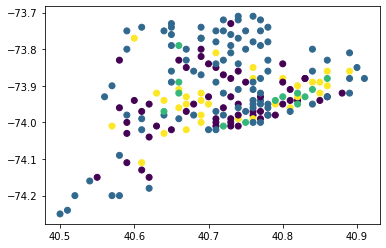

In [22]:
plt.scatter(mapping_['Lat'], mapping_['Lon'], c = mapping_['Label'])

## Data cleaning

In [23]:
timeseries_df = df_.copy()
timeseries_df['Threat_level']  = timeseries_df['Zipcode'].apply(lambda x: zip_code_mapping[str(x)])
timeseries_df['Mean_Income'] = timeseries_df['Mean_Income'].apply(lambda x: np.nan if x=='-' else x) 
timeseries_df['Median_Income'] = timeseries_df['Median_Income'].apply(lambda x: np.nan if x=='-' else x) 
timeseries_df.isna().sum()

Zipcode               0
Median_Income      5330
Mean_Income        5330
Age_Group             0
Arrest_Date           0
Arrest_Key            0
Ofns_Desc          1102
Pd_Desc            1102
Perp_Race             0
Perp_Sex              0
Arrest_Precinct       0
Lat                   0
Lon                   0
week                  0
day                   0
month                 0
Threat_level          0
dtype: int64

In [24]:
timeseries_df.shape

(593721, 17)

In [25]:
timeseries_df_ = timeseries_df.dropna(how='any', axis=0)
timeseries_df_.shape

(587306, 17)

## Time series?

In [26]:
timeseries_df_.dtypes

Zipcode                     int64
Median_Income              object
Mean_Income                object
Age_Group                  object
Arrest_Date        datetime64[ns]
Arrest_Key                  int64
Ofns_Desc                  object
Pd_Desc                    object
Perp_Race                  object
Perp_Sex                   object
Arrest_Precinct             int64
Lat                       float64
Lon                       float64
week                        int64
day                         int64
month                       int64
Threat_level                int64
dtype: object

In [27]:
timeseries_df_['Mean_Income'] = timeseries_df_['Mean_Income'].astype('str').apply(lambda x: x.replace('+', '')).astype('int')
timeseries_df_['Median_Income'] = timeseries_df_['Median_Income'].astype('str').apply(lambda x: x.replace('+', '').replace(',', '')).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
final_ts = timeseries_df_.groupby(['Arrest_Date', 'Threat_level'], as_index = False).agg({ 'Arrest_Key' : 'count', 'Median_Income' : 'mean', 'Mean_Income' : 'mean'  }).rename(columns = {'Arrest_Key' : 'no_of_crimes'})
final_ts.head(2)

,Arrest_Date,Threat_level,no_of_crimes,Median_Income,Mean_Income
0,2018-01-01,0,119,75586.957983,107672.764706
1,2018-01-01,1,79,81125.443038,103900.253165


In [32]:
final_ts['Threat_level'].value_counts()

0    1096
1    1096
2    1096
3    1096
Name: Threat_level, dtype: int64

# Threat level wise timeseries

In [62]:
final_ts['Median_Income'] = final_ts['Median_Income'].apply(int)
final_ts['Mean_Income'] = final_ts['Mean_Income'].apply(int)

Should we do ts for each threat level or use threat level as a feature??

In [99]:
threat_level_train = []
threat_level_test = []


for threat_level in final_ts['Threat_level'].unique():

  _df = final_ts[final_ts['Threat_level'] == threat_level].drop(columns = ['Threat_level'])

  for lag in range(1,8):
    _df['Lag_'+str(lag)] = _df['no_of_crimes'].shift(lag)


  print(pd.date_range(start="2018-01-01", end="2020-12-31").difference(_df.Arrest_Date))
  fig = px.line(_df, x='Arrest_Date', y="no_of_crimes", title = 'Daily crimes for the threat level= '+str(threat_level))
  fig.show()

  _df = _df.reset_index().drop(columns = ['Arrest_Date'])

  _df_train = _df.iloc[:-120]
  _df_test  = _df.iloc[-120:]

  threat_level_train.append(_df_train)
  threat_level_test.append(_df_test)




DatetimeIndex([], dtype='datetime64[ns]', freq='D')


DatetimeIndex([], dtype='datetime64[ns]', freq='D')


DatetimeIndex([], dtype='datetime64[ns]', freq='D')


DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [102]:
def seperate_features_target(training_data, test_data, target= 'no_of_crimes'):
  features = [feature for feature in training_data.columns if feature != target]


  X_train = training_data.dropna()[features]
  y_train = training_data.dropna()[target]

  X_test = test_data.dropna()[features]
  y_test = test_data.dropna()[target]

  return X_train, y_train, X_test, y_test

In [103]:
X_train, y_train, X_test, y_test = seperate_features_target(threat_level_train[0], threat_level_test[0])



In [104]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predict = lr.predict(X_test)

In [107]:
mean_squared_error(predict, y_test)**0.5

30.33320460871737

In [108]:
def linear_model(train, test):
  X_train, y_train, X_test, y_test = seperate_features_target(train, test)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  predict = lr.predict(X_test)

  rmse = mean_squared_error(predict, y_test)**0.5

  return lr, rmse  




In [109]:
linear_model(threat_level_train[0], threat_level_test[0])[1]

30.33320460871737

In [110]:
for threat_level in range(4):
  lr, rmse = linear_model(threat_level_train[threat_level], threat_level_test[threat_level])
  print('Threat_level: ', threat_level, 'RMSE: ', rmse)

Threat_level:  0 RMSE:  30.33320460871737
Threat_level:  1 RMSE:  10.571466354313277
Threat_level:  2 RMSE:  21.18550580832504
Threat_level:  3 RMSE:  31.173458730066734
